<a href="https://colab.research.google.com/github/henrifroese/twitter-poll/blob/master/twitter_pol_notebook_final_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<a href="https://colab.research.google.com/github/henrifroese/twitter-poll/blob/master/twitter_pol_notebook_final_DE.ipynb" target="_blank">Click here to view the notebook in colab (GitHub doesn't show the graphics!)</a>**

## Predicting the political views of (German & US) Twitter users from their Tweets with Deep Learning

The aim of this project is to train a Deep Learning model to predict a Twitter user's political affiliation from his or her tweets. The model showcased here achieves an accuracy of around 80%. 

The tweets of politicians are used as training data. For example, Tweets from Angela Merkel would be part of the training set for the CDU/CSU party.


Exemplary applications of the developed network are:
* Classifying news articles/organizations by predicting the political affiliation of those who retweet and like them
* Understanding if/how "filter bubbles" develop by analyzing user's social graphs through the network
* Finding differences in hate speech usage across parties


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
!pip install mpld3
import mpld3
mpld3.enable_notebook()

import numpy as np
import pandas as pd
import pickle

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [ ]:
!pip install TwitterSearch
from TwitterSearch import *
from os import listdir
import importlib.util

spec = importlib.util.spec_from_file_location("keyfile", "/content/drive/My Drive/twitter_pol/keyfile.py")  # twitter api access tokens are stored in the keyfile
keyfile = importlib.util.module_from_spec(spec)
spec.loader.exec_module(keyfile)

The following usernames (grouped by Party) will be used to train/validate the network. All of them are members or confirmed supporters of the party they're grouped with.

In [ ]:
cdu_list = ['rbrinkhaus', 'SteinekeCDU', 'jensspahn', 'groehe', 'HHirte',
'MBiadaczMdB', 'Erwin_Rueddel', 'RKiesewetter', 'christophploss', 'DrAndreasNick',
'Dr_Roy_Kuehne', 'MGrosseBroemer', 'JM_Luczak', 'TinoSorge', 'akk', 'PaulZiemiak',
'JuliaKloeckner', 'ArminLaschet', 'vonderleyen', 'MPKretschmer', 'MikeMohring',
'caspary', 'AxelVossMdEP', '_FriedrichMerz', 'peteraltmeier', 'petertauber',
'SvenVolmering', 'tschipanski', 'DWoehrl', 'StefanKaufmann',
'PSchnieder', 'UweSchummer', 'erwin_rueddel', 'koschyk', 'peersteinbrueck',
'groehe', 'schroeder_k', 'MGrosseBroemer', 'NadineSchoen',
'berndfabritius', 'SteinekeCDU', 'mechthildheil', 'TinaSchwarzer',
'marcusweinberg', 'julia_obermeier', 'wanderwitz', 'MatthiasHauer',
'Axel_Fischer', 'plengsfeld', 'VolkerUllrich',
'BettinaHornhues', 'helmut_nowak', 
'matthiaszimmer', 'berndsiebert', 'tj_tweets', 'missfelder',
'drmfuchs', 'meister_schafft', 'christianhirte', 'fuchtel',
'juergenhardt', 'tschipanski', 'MaikBeermann', 'charlesmhuber49', 'ninawarken',
'SylviaPantel', 'XaverJung', 'PatrickSensburg',
'frankheinrich', 'Wellenreuther', 'guenterkrings',
'Manfredbehrens', 'jungfj', 'KLeikert',
'anjaweisgerber', 'HGundelach', 'GudrunZollner',
'amattfeldt', 'davidmcallister', 'Missfelder', 'GOettingerEU',
'NadineSchoen', 'schroeder_k', 'UweSchummer']

greens_list = ['ABaerbock', 'GoeringEckardt', 'svenlehmann', 'AnjaSiegesmund', 
'MiKellner', 'Gesine_Agena', 'bueti', 'sven_giegold', 'L_Petersdotter', 'UNonnemacher', 
'jamila_anna', 'SkaKeller', 'Ben_Raschke', 'Ka_Meier', 'Gruen_WGuenther', 'RenateKuenast',
'sven_kindler', 'KonstantinNotz', 'cem_oezdemir', 'JTrittin', 'HajdukBundestag', 'K_SA', 
'BriHasselmann', 'GruenSprecher', 'beatewaro', 'W_SK', 'katjadoerner', 'oezcanmutlu', 'steffilemke',
'BabettesChefin', 'LisaPaus', 'TabeaRoessner', 'Volker_Beck', 'DJanecek', 'monikalazar',
'ekindeligoez', 'mdb_stroebele', 'steffilemke', 'BaerbelHoehn', 'Volker_Beck',
'tobiaslindner', 'KaiGehring', 'nouripour', 'kerstinandreae', 'ekindeligoez',
'GrueneBeate', 'WilmsVal', 'katjadoerner', 'NicoleMaisch', 'DJanecek', 'ManuelSarrazin',
'Luise_Amtsberg', 'ebner_sha', 'IreneMihalic', 'Oliver_Krischer',
'ulle_schauws', 'julia_verlinden', 'katdro', 'Uwekekeritz', 'beatewaro',
'BabettesChefin', 'BrigittePothmer', 'crueffer', 'DorisWagner_MdB', 'monikalazar',
'KoenigsGruen', 'fbrantner', 'MarieluiseBeck', 'markuskurthmdb', 'StarkeRegionen',
'peter_simone', 'JanAlbrecht', 'bueti', 'sven_giegold', 'WinneHermann',
'ToniHofreiter', 'stephankuehn', 'KathaSchulze']

spd_list = ['Karl_Lauterbach', 'kahrs', 'EvaHoegl', 'KatjaMast', 'OlafScholz', 
'Achim_P', 'soerenbartol', 'baerbelbas', 'JensZimmermann1', 'HeikoMaas', 'NilsSchmid', 
'thomashitschler', 'schneidercar', 'SvenjaSchulze68', 'MarjaVoellers', 'EskenSaskia', 
'NilsSchmid', 'FrankSchwabe', 'hubertus_heil', 'sigmargabriel', 'Ralf_Stegner', 'larsklingbeil', 
'KarambaDiaby', 'Lothar_Binding', 'UlrichKelber', 
'ManuelaSchwesig', 'MiRo_SPD', 'g_reichenbach', 'thomashitschler',
'ThomasOppermann', 'florianpronold', 'FrankeEdgar', 'KerstinGriese',
'SCLemme', 'michaelaengel', 'PErnstberger', 'UlliNissen', 'Schwarz_MdB', 'Elke_Ferner',
'danielakolbe', 'swenschulz', 'achim_p', 'MetinHakverdi', 'NielsAnnen', 
'HildeMattheis', 'c_kampmann', 'ChristianFlisek', 'MartinRosemann', 'michael_thews',
'brigittezypries', 'rainerarnold', 'RebmannMdB', 'juergencosse',
'FlorianPost', 'W_Priesmeier', 'SusannRuethrich', 'BetMueller',
'michaelgrossmdb', 'marcobuelow', 'edrossmann',
'rischwasu', 'dieschmidt', 'GabiWeberSPD',
'JensZimmermann1', 'DennisRohde', 'AnnetteSawade', 'oezdemir_spd',
'GabyKatzmarek', 'ThomasHitschler', 'fritzfelgentreu', 'larscastellucci',
'zierke', 'HiltrudLotze', 'arnoklare', 'MalechaNissen', 'A_Gloeckner',
'Aschenbrennerin', 'GescheJoost', 'MartinSchulz', 'KazunguHass', 'Alex_Schweitzer',
'MartinRosemann', 'D_Stich', 'Sabine_Baetzing', 'JensZimmermann1', 'UlliNissen',
'Schwarz_MdB', 'Achim_P', 'LangeMdB', 'sebast_hartmann', 'KerstinGriese',
'KaczmarekOliver', 'KuehniKev']

afd_list = ['Joerg_Meuthen', 'UlrichSiegmund', 'Alice_Weidel', 'UdoHemmelgarn', 
'Joerg_UrbanAfD', 'M_Reichardt_AfD', 'Georg_Pazderski', 'PoggenburgAndre', 'GottfriedCurio', 
'GtzFrmming', 'gunnar_beck', 'BjoernHoecke', 'M_HarderKuehnel', 
'Leif_Erik_Holm', 'Frank_Pasemann', 'WMuhsal', 'torben_braga', 'StBrandner', 'Beatrix_vStorch', 
'JoanaCotar', 'AndreasBleckMdB', 'DirkSpaniel', 'Renner_AfD', 'DroeseSigbert',
'WolfgangWiehle', 'DrHollnagel', 'MdB_Mueller_AfD', 'JoernKoenigAfD', 'Jacobi_AfD',
'VerHartmannAfD', 'Frank_Magnitz', 'HuberMdB', 'HilseMdB', 'ChrWirthMdB',
'Martin_Sichert', 'JuergenBraunAfD', 'KestnerJens', 'JensMaierAfD',
'DrFriesenMdB', 'Th_Seitz_AfD', 'SteffenKotre', 'EspendillerM',
'Buettner_MdB', 'MartinHess_AfD', 'CorinnaMiazga', 'NKleinwaechter',
'S_Muenzenmaier', 'UdoHemmelgarn', 'h_weyel', 'Rene_Springer',
'ProfMaier', 'JoanaCotar', 'PetrBystronAfD', 'DirkSpaniel',
'MarcBernhardAfD', 'Dr_Rainer_Kraft', 'Tino_Chrupalla', 'StefanKeuterAfD',
'EnricoKomning', 'Gerold_Otten', 'Paul_Podolay', 'Marcus_Buehl',
'Schneider_AfD', 'Jochen_Haug', 'MdB_Lucassen', 'Witt_Uwe',
'ElsnervonGronow', 'Frohnmaier_AfD', 'Marc_Jongen', 'Jan_Nolte_AfD',
'WaldemarHerdt', 'Ulrich_Oehme', 'ThomasEhrhorn', 'Nicole_Hoechst',
'mrosek1958', 'M_Reichardt_AfD', 'TobiasMPeterka', 'MalsackWinkeman',
'axelgehrke', 'ttte94', 'Frank_Pasemann', 'AfDProtschka',
'KayGottschalk1']

linke_list = ['b_riexinger', 'DietmarBartsch', 'katjakipping', 'SWagenknecht', 'GregorGysi', 
'bodoramelow', 'JoergSchindler', 'FabioDeMasi', 'ernst_klaus', 'MartinaRenner', 'CarenLay', 
'SusanneHennig', 'sebastiank', 'NordMdB', 'NiemaMovassat', 'DorisAchelwilm', 'ZaklinNastic',
'KirstenTackmann', 'SevimDagdelen', 'PetraPauMaHe', 'MichaelLeutert', 'berlinliebich',
'SusanneFerschl', 'LINKEPELLI', 'Petra_Sitte_MdB', 'Halina_Waw', 'Halina_Waw', 'voglerk',
'MichaelLeutert', 'MWBirkwald', 'MartinaRenner', 'Team_GLoetzsch', 'ernst_klaus',
'Diether_Dehm', 'AndrejHunko', 'Katrin_Werner', 'AlexanderSNeu', 'UllaJelpke',
'JuttaKrellmann', 'ch_buchholz', 'HeikeHaensel', 'katrinbinder', 'JuttaKrellmann'
, 'martina_michels', 'Andi_Wagner', 'SusanneFerschl', 'jessica_tatti',
'Amira_M_Ali', 'AkbulutGokay', 'F_Brychcy', 'FrStraetmanns', 'MdB_Schreiber',
'MdB_Freihold', 'HESommer', 'Ingrid_Remmers', 'victorperli', 'pascalmeiser',
'AchimKesslerMdB', 'SylviaGabelmann', 'joerg_cezanne', 'michael_brandt',
'lgbeutin', 'SBarrientosK', 'DorisAchelwilm', 'CanselK', 'SeeroiberJenny',
'CansuOezdemir']

fdp_list = ['G_UllrichFDP', 'rock_fdp', 'MarcoBuschmann', 'c_lindner', 'KemmerichThL',
'nicolabeerfdp', 'LindaTeuteberg', 'Lambsdorff', 'KonstantinKuhle', 'johannesvogel',
'DFoest', 'ChristophFDP', 'k_willkomm', 'starkwatzinger', 'f_schaeffler', 
'jimmyschulz', 'EUTheurer', 'MarcusFaber', 'torstenherbst', 'OlliLuksic',
'koehler_fdp', 'HoffmannForest', 'KatjaSuding', 'MAStrackZi', 'danielbahr',
'lassebecker', 'ManuelHoeferlin', 'sls_fdp', 'Andi_Glueck', 'CGrascha',
'krstdt', 'AGBuelow', 'moritzkoerner', 'tinademeeus', 'jcoetjen', 'nicole_ae_bauer',
'DanielaKluckert', 'jensbeeck', 'UllmannMdB', 'th_sattelberger', 'GydeJ',
'muellerboehm', 'c_jung77', 'BraFDP', 'HoubenReinhard', 'WSchinnenburg',
'JBrandenburgFDP', 'sandra_weeser', 'carina_konrad', 'koehler_fdp',
'olafinderbeek', 'HartmutEbbing', 'reinholdmdb', 'reuther_bernd',
'G_UllrichFDP', 'busen_mdb', 'alexmuellerfdp', 'JudithSkudelny',
'TillMansmann', 'DjirSarai', 'GeroHocker', '_MartinNeumann',
'aggelidis_fdp', 'theliberalfrank', 'ulrichlechte', 'NicoleWestig',
'MdBKlein', 'HerbrandMarkus', 'BrittaDassler', 'RenataAlt_MdB',
'realMartinHagen', 'starkwatzinger', 'rock_fdp', 'hoffmann_fdp',
'StephanThomae', 'KH_Paque', 'j_huettl', 'bstrasser', 'nicolabeerfdp']

In [ ]:
import typing
from typing import *

In [ ]:
def tweets_from_usernames(usernames: List[str], party_id: int, num_parties=6) -> List[Any]:
    '''
    usernames: List of twitter handles; have to be from the same party
    party_id: int to assign the tweets to a class (e.g. 1 -> returns [[tweet, 1, 0, 0, 0, 0, 0], ...])
    num_parties: total number of parties

    returns list of lists, with each list of form [tweet, 0, 0, 1, 0, 0] with 1 at party_id (e.g. here = 3) and num_parties 0s and 1s
    '''
    ts = TwitterSearch(
        consumer_key = keyfile.consumer_key,
        consumer_secret = keyfile.consumer_secret,
        access_token = keyfile.access_token,
        access_token_secret = keyfile.access_token_secret
     )

    all_users_combined = []
    one_hot_enc_mask = [0] * num_parties
    one_hot_enc_mask[party_id - 1] = 1

    for username in usernames:
        try:
            tuo = TwitterUserOrder(username)
            tuo.set_include_rts(False)
            tuo.arguments.update({'tweet_mode':'extended'})  # change to Twitter API -> text truncated by default -> set to extended

            for index, tweet in enumerate(ts.search_tweets_iterable(tuo)):
                tweet_content = tweet['full_text']
                all_users_combined.append([tweet_content] + one_hot_enc_mask)
                if index == 99:  # 100 tweets per user
                    break

        except TwitterSearchException as e:
            print(e, username)

    return all_users_combined

In [ ]:
# example
tweets_from_usernames(['c_lindner'], party_id=2, num_parties=3)[2]

['In den Zeiten einer Krise darf die schwarze Null aber nicht zum Dogma werden, durch das wir die Handlungsfähigkeit des Staates fesseln und den Schutz wirtschaftlicher Interessen erschweren.',
 0,
 1,
 0]

## Getting (and serializing) the tweets for each party

In [ ]:
ordered_parties = [linke_list, greens_list, spd_list, fdp_list, cdu_list, afd_list]

In [ ]:
tweets_linke = tweets_from_usernames(usernames=linke_list, party_id=1, num_parties=6)

In [ ]:
# example
tweets_linke[0]

['Das Löschen von #Handydaten scheint bei der #CSU/#CDU zur Gewohnheit zu werden. Diese #Bundesregierung soll nichts mehr von Transparenz erzählen!\n#Scheuer https://t.co/7B0YEneqiB',
 1,
 0,
 0,
 0,
 0,
 0]

In [ ]:
with open("/content/drive/My Drive/twitter_pol/tweets_linke_new.pkl", 'wb') as f:
  pickle.dump(tweets_linke, f)

In [ ]:
tweets_greens = tweets_from_usernames(usernames=greens_list, party_id=2, num_parties=6)

In [ ]:
with open("/content/drive/My Drive/twitter_pol/tweets_greens_new.pkl", 'wb') as f:
  pickle.dump(tweets_greens, f)

In [ ]:
tweets_spd = tweets_from_usernames(usernames=spd_list, party_id=3, num_parties=6)

In [ ]:
with open("/content/drive/My Drive/twitter_pol/tweets_spd_new.pkl", 'wb') as f:
  pickle.dump(tweets_spd, f)

In [ ]:
tweets_fdp = tweets_from_usernames(usernames=fdp_list, party_id=4, num_parties=6)

In [ ]:
with open("/content/drive/My Drive/twitter_pol/tweets_fdp_new.pkl", 'wb') as f:
  pickle.dump(tweets_fdp, f)

In [ ]:
tweets_cdu = tweets_from_usernames(usernames=cdu_list, party_id=5, num_parties=6)

In [ ]:
with open("/content/drive/My Drive/twitter_pol/tweets_cdu_new.pkl", 'wb') as f:
  pickle.dump(tweets_cdu, f)

In [ ]:
tweets_afd = tweets_from_usernames(usernames=afd_list, party_id=6, num_parties=6)

In [ ]:
with open("/content/drive/My Drive/twitter_pol/tweets_afd_new.pkl", 'wb') as f:
  pickle.dump(tweets_afd, f)

## combining all tweets into a dataframe

In [ ]:
all_tweets = tweets_linke + tweets_greens + tweets_spd + tweets_fdp + tweets_cdu + tweets_afd

In [ ]:
df_all_tweets = pd.DataFrame(all_tweets, columns=["text", "linke", "green", "spd", "fdp", "cdu", "afd"])

In [ ]:
df_all_tweets.head()

,text,linke,green,spd,fdp,cdu,afd
0,Das Löschen von #Handydaten scheint bei der #C...,1,0,0,0,0,0
1,Aber überfällige Investitionen ins #Gesundheit...,1,0,0,0,0,0
2,Das kommt etwas überraschend von der @FDP. Wir...,1,0,0,0,0,0
3,Das #Bundesverfassungsgericht lehnt den Eilant...,1,0,0,0,0,0
4,Die #Bundesregierung reagiert nicht angemessen...,1,0,0,0,0,0


In [ ]:
df_all_tweets.to_pickle("/content/drive/My Drive/twitter_pol/all_tweets.pkl")

In [ ]:
df = pd.read_pickle("/content/drive/My Drive/twitter_pol/all_tweets.pkl")

BERT input sequences must be at most 512 tokens long. Concat tweets to max 500 each to produce longer tokens that are close to the maximum length.

In [ ]:
with open("/content/drive/My Drive/twitter_pol/tweets_linke_new.pkl", 'rb') as f:
  tweets_linke = pickle.load(f)
with open("/content/drive/My Drive/twitter_pol/tweets_greens_new.pkl", 'rb') as f:
  tweets_greens = pickle.load(f)
with open("/content/drive/My Drive/twitter_pol/tweets_spd_new.pkl", 'rb') as f:
  tweets_spd = pickle.load(f)
with open("/content/drive/My Drive/twitter_pol/tweets_fdp_new.pkl", 'rb') as f:
  tweets_fdp = pickle.load(f)
with open("/content/drive/My Drive/twitter_pol/tweets_cdu_new.pkl", 'rb') as f:
  tweets_cdu = pickle.load(f)
with open("/content/drive/My Drive/twitter_pol/tweets_afd_new.pkl", 'rb') as f:
  tweets_afd = pickle.load(f)

In [ ]:
# concat to 500 each
def concat_tweets(tweets_with_one_hot):
    '''
    tweets_with_one_hot: List of form [[tweet, 1, 0, 0], ...]

    returns list of tweets with each sublist having <= 500 tokens
    '''
    concatenated_tweets = []
    one_hot_enc_mask = tweets_with_one_hot[0][1:]
    curr = ""
    for tweet_with_one_hot in tweets_with_one_hot:
      tweet_content = tweet_with_one_hot[0]
      if len(curr) + len(tweet_content.split()) <= 500:
        curr += " " + tweet_content
      else:
        concatenated_tweets.append([curr] + one_hot_enc_mask)
        curr = tweet_content
    if curr:
      concatenated_tweets.append([curr] + one_hot_enc_mask)
    
    return concatenated_tweets

In [ ]:
all_tweets_concat = concat_tweets(tweets_linke) + concat_tweets(tweets_greens) + concat_tweets(tweets_spd) + concat_tweets(tweets_fdp) + concat_tweets(tweets_cdu) + concat_tweets(tweets_afd)
df_all_tweets = pd.DataFrame(all_tweets_concat, columns=["text", "linke", "green", "spd", "fdp", "cdu", "afd"])

In [ ]:
df_all_tweets.to_pickle("/content/drive/My Drive/twitter_pol/all_tweets_concat.pkl")

# Data Preprocessing

In [ ]:
df = pd.read_pickle("/content/drive/My Drive/twitter_pol/all_tweets_concat.pkl")
df

,text,linke,green,spd,fdp,cdu,afd
0,Das Löschen von #Handydaten scheint bei der #...,1,0,0,0,0,0
1,Das #Bundesverfassungsgericht lehnt den Eilant...,1,0,0,0,0,0
2,#Rüstungsexporte verdoppelt: Die #Bundesregier...,1,0,0,0,0,0
3,Das #Coronavirus trifft den #DAX (vor allem ps...,1,0,0,0,0,0
4,Ich sage es klar und selbstkritisch: So ein Sp...,1,0,0,0,0,0
...,...,...,...,...,...,...,...
14566,https://t.co/IfeK1v1afy Finanzausschuss.\nAfD ...,0,0,0,0,0,1
14567,Es muss natürlich Leiter heißen!😜 Auf gehts na...,0,0,0,0,0,1
14568,Liebe Altpolitiker @SpD @CdU @CsUund Möchteger...,0,0,0,0,0,1
14569,Auf die nächsten 30 Jahre! Auf ewig ungeteilt!...,0,0,0,0,0,1


## cleaning the tweets

In [ ]:
!pip install texthero
import texthero as hero

df['text']=df['text'].pipe(hero.clean)

In [ ]:
df

,text,linke,green,spd,fdp,cdu,afd
0,Das Löschen von Handydaten scheint bei der CS...,1,0,0,0,0,0
1,Das Bundesverfassungsgericht lehnt den Eilantr...,1,0,0,0,0,0
2,Rüstungsexporte verdoppelt Die Bundesregierung...,1,0,0,0,0,0
3,Das Coronavirus trifft den DAX vor allem psych...,1,0,0,0,0,0
4,Ich sage es klar und selbstkritisch So ein Spr...,1,0,0,0,0,0
...,...,...,...,...,...,...,...
14566,Finanzausschuss AfD wirkt Letzter Tag in Wash...,0,0,0,0,0,1
14567,Es muss natürlich Leiter heißen😜 Auf gehts nac...,0,0,0,0,0,1
14568,Liebe Altpolitiker SpD CdU CsUund Möchtegern M...,0,0,0,0,0,1
14569,Auf die nächsten 30 Jahre Auf ewig ungeteilt T...,0,0,0,0,0,1


In [ ]:
# shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
# function to plot the training progress
import matplotlib.pyplot as plt
def my_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)

  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4))
  ax1.plot(epochs, acc, 'b', label='Training acc')
  ax1.plot(epochs, val_acc, 'g', label='Validation acc')
  ax1.set_title('Training and validation accuracy')
  ax1.legend()

  # ax1.set_figure()

  ax2.plot(epochs, loss, 'b', label='Training loss')
  ax2.plot(epochs, val_loss, 'g', label='Validation loss')
  ax2.set_title('Training and validation loss')
  ax2.legend()

  plt.show()

def my_plot_2(history):
  acc = history['accuracy']
  val_acc = history['val_accuracy']
  loss = history['loss']
  val_loss = history['val_loss']
  epochs = range(1, len(acc) + 1)

  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4))
  ax1.plot(epochs, acc, 'b', label='Training acc')
  ax1.plot(epochs, val_acc, 'g', label='Validation acc')
  ax1.set_title('Training and validation accuracy')
  ax1.legend()

  # ax1.set_figure()

  ax2.plot(epochs, loss, 'b', label='Training loss')
  ax2.plot(epochs, val_loss, 'g', label='Validation loss')
  ax2.set_title('Training and validation loss')
  ax2.legend()

  plt.show()

## Word Cloud

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


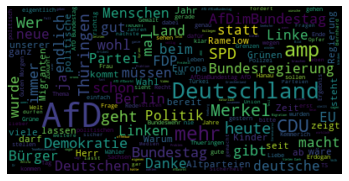

In [ ]:
stopw = set(stopwords.words('german'))
stopw2 = set(stopwords.words('english'))
afd_text = ' '.join([word for word in ' '.join(df[df["afd"]==1].text.values.tolist()).split() if word.lower() not in stopw and word.lower() not in stopw2])

wordcloud = WordCloud(max_font_size=40).generate(afd_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Simple Approach
Here we use the [BERT Embeddings](https://huggingface.co/transformers/model_doc/bert.html#tfbertmodel) on the Text to create high-dimensional embeddings of the tweets. Those embeddings are the input for the model. The model first embeds these embeddings into a new 512-dim. embedding. The resulting embeddings are fed into a bidirectional LSTM layer. Finally, a dense softmax layer with 6 nodes is applied to get party probabilities.

This relatively simple approach yields about 70% accuracy.

In [ ]:
import tensorflow as tf

tf.keras.backend.set_floatx("float32")

train_targets = df[["linke", "green", "spd", "fdp", "cdu", "afd"]]
train_targets = train_targets.values

train_inputs = df.text.values

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_inputs)

train_sequences = tokenizer.texts_to_sequences(train_inputs)
train_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=500, padding="post", truncating="post")

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=10001, output_dim=256, input_length=500, input_shape=(500,)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64), input_shape=(500, 256)))
model.add(tf.keras.layers.Dense(6, activation='softmax', input_shape=(128,)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 256)          2560256   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 2,725,382
Trainable params: 2,725,382
Non-trainable params: 0
_________________________________________________________________


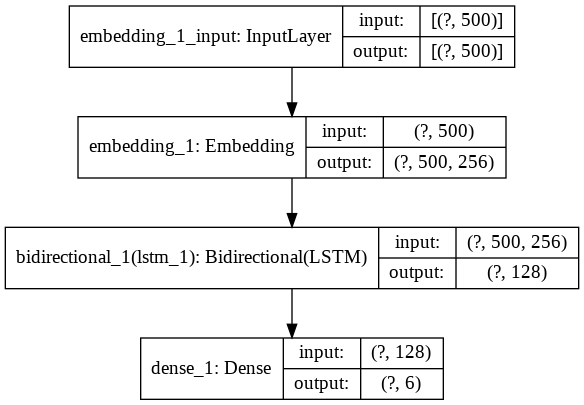

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
opt = tf.keras.optimizers.RMSprop()
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(tf.convert_to_tensor(train_sequences, dtype=tf.float32), train_targets,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
92/92 [==============================] - 12s 125ms/step - loss: 1.6652 - acc: 0.3002 - val_loss: 1.4964 - val_acc: 0.3887
Epoch 2/10
92/92 [==============================] - 11s 116ms/step - loss: 1.2521 - acc: 0.5184 - val_loss: 2.4850 - val_acc: 0.3074
Epoch 3/10
92/92 [==============================] - 11s 116ms/step - loss: 0.8593 - acc: 0.6951 - val_loss: 1.2578 - val_acc: 0.5588
Epoch 4/10
92/92 [==============================] - 11s 117ms/step - loss: 0.5705 - acc: 0.8095 - val_loss: 1.1342 - val_acc: 0.6096
Epoch 5/10
92/92 [==============================] - 11s 117ms/step - loss: 0.3844 - acc: 0.8758 - val_loss: 1.0975 - val_acc: 0.6744
Epoch 6/10
92/92 [==============================] - 11s 116ms/step - loss: 0.2518 - acc: 0.9231 - val_loss: 1.0249 - val_acc: 0.7046
Epoch 7/10
92/92 [==============================] - 11s 117ms/step - loss: 0.1672 - acc: 0.9504 - val_loss: 1.2921 - val_acc: 0.6535
Epoch 8/10
92/92 [==============================] - 11s 117ms/step - 

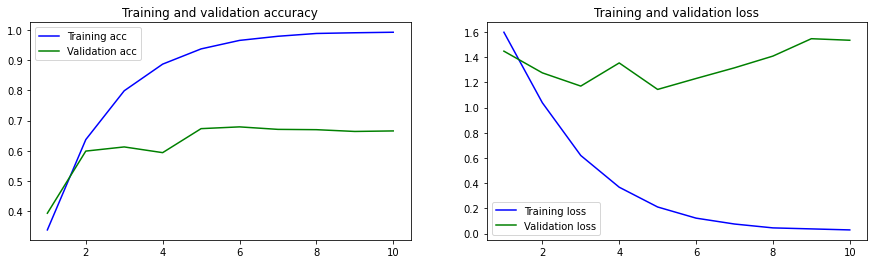

In [ ]:
my_plot(history)

In [ ]:
# To store the model.

import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

# Advanced Approach: BERT for Sequence Classification
In this approach, the BERT model (and not only the embeddings as in the former approach) is used to classify the tweets. The [cls] special token is fed straight into a final dense softmax layer for classification as suggested in the [BERT paper](https://arxiv.org/abs/1810.04805) (using the full sequence output or the pooled output has not lead to better results).

Performance is around 76-80% after 2-4 epochs.

In [ ]:
import tensorflow as tf
%tensorflow_version 2.x

from keras.utils import plot_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

!pip install transformers
import transformers
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("bert-base-german-cased")
bert_layer = transformers.TFBertModel.from_pretrained("bert-base-german-cased")

Using TensorFlow backend.


'2.2.0'

In [ ]:
def bert_encode(texts, tokenizer, max_len=512):
    '''
    texts: list of strings, each string one text to be encoded (e.g. ["First tweet text", "Second tweet text", ...])
    tokenizer: a BERT tokenizer (e.g. AutoTokenizer.from_pretrained("bert-base-german-cased"))
    max_len: maximum length of each string (number of words!) in the texts list

    output: tuple of BERT encodings of the input texts: (word_ids, attention_masks, segment_ids)
    '''
    all_tokens = []
    all_masks = []
    all_segments = []

    for text in texts:
        text = tokenizer.tokenize(text)

        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)

    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
# example
bert_encode(["Text one", "Text two"], tokenizer, max_len=5)

(array([[    3,  3779,  6634, 26897,     4],
        [    3,  3779,   209,  3761,     4]]), array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]]), array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]))

In [ ]:
train_input = bert_encode(df.text.values, tokenizer, max_len=500)

train_targets = df[["linke", "green", "spd", "fdp", "cdu", "afd"]]
train_targets = train_targets.values


BERT paper suggests
- Learning rate (Adam): 5e-5, 3e-5, 2e-5
- Number of epochs: 2, 3, 4

In [ ]:
def build_model(bert_layer, max_len=512, l_rate=2e-5):
    # 3 inputs (as returned by bert_encode): word ids, attention masks, segment ids
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    # bert layer returns two outputs: a sequence output and an already-pooled output (that we don't need for classification)
    sequence_output, pooled_output = bert_layer([input_word_ids, input_mask, segment_ids])
    out = Dense(6, activation='softmax')(sequence_output[:, 0, :])  # very first arg of seq output is [cls]-token that will be used for classification

    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=l_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
model = build_model(bert_layer, max_len=500, l_rate=2e-5)

In [ ]:
model.summary(line_length=150)

Model: "model_9"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_word_ids (InputLayer)                      [(None, 500)]                    0                                                                   
______________________________________________________________________________________________________________________________________________________
input_mask (InputLayer)                          [(None, 500)]                    0                                                                   
______________________________________________________________________________________________________________________________________________________
segment_ids (InputLayer)                         [(None, 500)]               

In [ ]:
train_history = model.fit(
    train_input, train_targets,
    validation_split=0.2,
    epochs=3,
    batch_size=8  # batch size 16+ (as recommended in BERT paper) too expensive for colab
)

1457/1457 [==============================] - 858s 589ms/step - loss: 1.1435 - accuracy: 0.5752 - val_loss: 0.8880 - val_accuracy: 0.6782


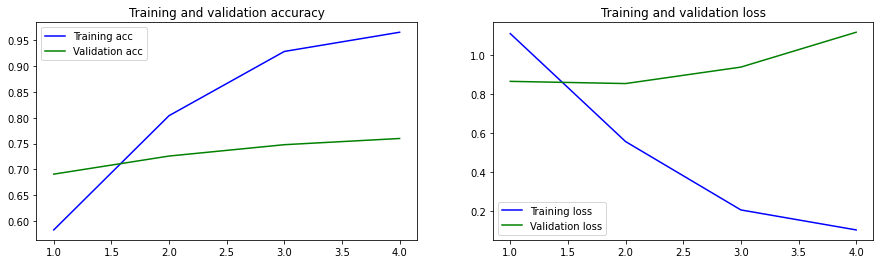

In [ ]:
my_plot_2(train_history)

In [ ]:
tf.keras.models.save_model(model, '/content/drive/My Drive/twitter_pol/my_model.h5py')  # creates a HDF5 file 'my_model.h5'

# Using the BERT Network for predictions

In [ ]:
import tensorflow as tf
from keras import backend as K

from tensorflow.python.saved_model import builder as saved_model_builder
from tensorflow.python.saved_model import tag_constants, signature_constants, signature_def_utils_impl

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np

Using TensorFlow backend.


In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/twitter_pol/my_model.h5py', custom_objects=None, compile=True)

In [ ]:
!pip install TwitterSearch
import nltk
nltk.download('stopwords')
import importlib.util

spec = importlib.util.spec_from_file_location("tweets", "/content/drive/My Drive/twitter_pol/tweets.py")
tweets = importlib.util.module_from_spec(spec)
spec.loader.exec_module(tweets)

In [ ]:
def username_to_prediction(username):
  '''
  username: valid twitter username as string (user must not be private)

  returns tuple (username, pred) where pred is 6-dimensional array of softmax output
  '''
  # get and concat (to <= 500 each) and concat up to 100 tweets of the given username
  list_of_tweets = [remove_URL(remove_html(remove_punct(tweet[0]))) for tweet in concat_tweets(tweets_from_usernames([username], party_id=1, num_parties=2))]
  # encode the user's tweets
  network_input = bert_encode(list_of_tweets, tokenizer, max_len=500)
  # get the network's predictions
  preds = model.predict(network_input, verbose=0)
  return username, np.mean(preds, axis=0)

In [ ]:
def plot_prediction(username, user_prediction):
  fig, ax = plt.subplots()
  rects1 = ax.bar(np.arange(len(np.squeeze(user_prediction))),np.squeeze(user_prediction))
  ax.set_xticks(np.arange(len(np.squeeze(user_prediction))))
  ax.set_xticklabels(("linke", "green", "spd", "fdp", "cdu", "afd"))
  ax.set_ylabel('Confidence')
  ax.set_xlabel('Party')
  ax.yaxis.set_label_coords(-0.12,0.5)
  title = "username: " + username
  ax.set_title(title)
  plt.show()

In [ ]:
def username_to_plot(username):
  plot_prediction(*username_to_prediction(username))  

### Showcasing the network:
Of course, none of the accounts shown here were present in training/validation/test data.


"AfD_HD" is the official twitter account of the AfD in Heidelberg.

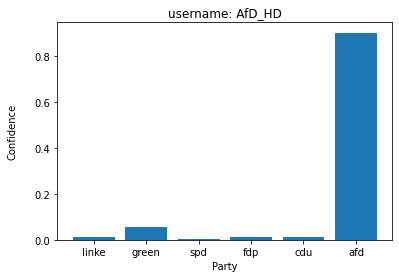

In [ ]:
username_to_plot("AfD_HD")

Malte Kaufmann is chairman of the AfD Heidelberg

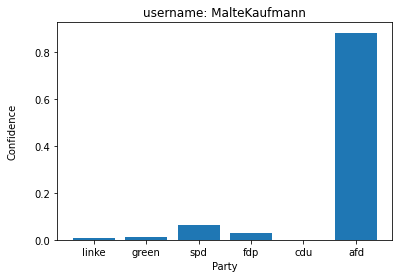

In [ ]:
username_to_plot("MalteKaufmann")

Official twitter account of CDU in Saxony

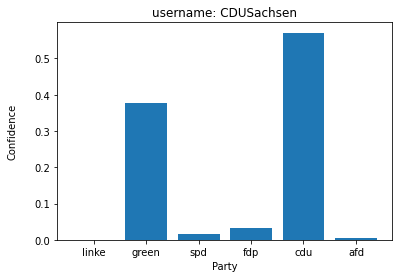

In [ ]:
username_to_plot("CDUSachsen")

Official account of SPD in Hamburg

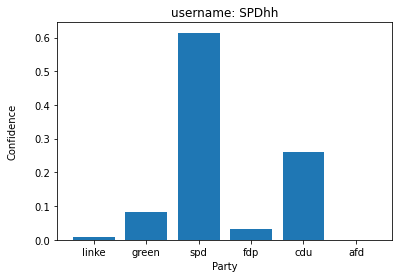

In [ ]:
username_to_plot("SPDhh")

Official account of Green Party


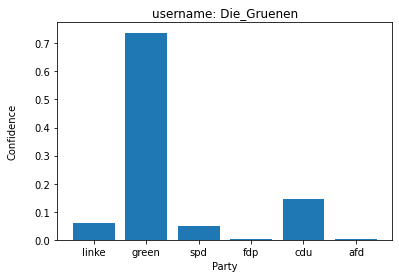

In [ ]:
username_to_plot("Die_Gruenen")

Official account of Linke in the national parliament

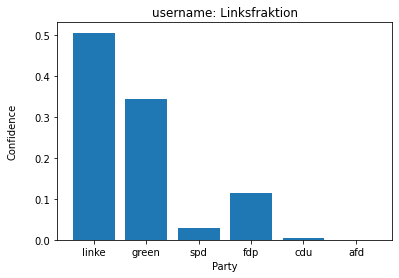

In [ ]:
username_to_plot("Linksfraktion")

Official account of FDP in the national parliament

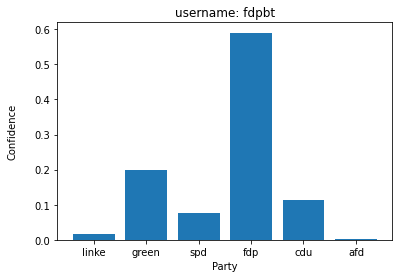

In [ ]:
username_to_plot("fdpbt")